In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import os

# Introduction
With the rise of the digital presence and social media, customer reviews have become an increasingly important factor that influences purchase decisions for many people. When we hear about the new restaurant just open a few blocks away from the office, we often find yourself reaching for our phone and look up the information about the said restaurant before deciding to spend some money on a hopefully delicious meal. Yelp is the go-to application for many people, largely due to the crowd-sourced nature of the reviews. Yelp provides an open platform for customers to voice their opinion about the quality of certain services, and as a result, incentives businesses to raise to the standard of expectation. Conveniently, Yelp published their dataset for personal, educational, and academic uses. 

# Project Description
The project is set out to provide a comprehensive exploration of the Yelp reviews dataset. More specifically, I was hoping to explore this dataset to find interesting insights, trends, patterns, as well as develop a statistical model that analyzes the sentiment of customers on this platform. 

# Data
The data is provided directly by Yelp and can be downloaded at https://www.yelp.com/dataset. The data is composed of single object type, one JSON-object per-line. 5 files that contains different attribute about businesses, reviews, user information, check-ins, and tips written by a user on a business. 
In total, there are:

•	6,685,900 user reviews

•	Information on 192,609 businesses

•	The data spans 11 metropolitan areas

# Analysis
There is much to learn in this dataset. Besides the traditional descriptive techniques, I can examine many different visualization techniques to highlight the significant trends and patterns in the data. Since the data is rich in geographical information (coordinate), I will analyze the data with the aid of mapping visualization. 
I will also use NLP methods to clean, vectorized and assess sentiment using the reviews that the customers provide. Or perhaps I could try to predict the number of stars that an establishment may receive depending on the reviews and other attributes in the dataset.


# Exploratory Data Analysis

Let's first take a look at the available tables that we have in the data directory:

In [2]:
for file_name in os.listdir():
    if file_name.endswith('.csv'):
        print(file_name)

business.csv
checkin.csv
photo.csv
review.csv
review_sample.csv
sentiment_results.csv
tip.csv
user.csv


We have 5 tables, each describes a number of attributes related to a specific topic such as businesses, reviews, user, etc. Since this is a massive dataset, it best to approach each table separately to gain information about each topic area before combining the tables together.

## Business Table

In [3]:
business =  pd.read_csv("business.csv")
business.head()

business_id                             name  \
0  1SWheh84yJXfytovILXOAQ       Arizona Biltmore Golf Club   
1  QXAEGFB4oINsVuTFxEYKFQ       Emerald Chinese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ      Musashi Japanese Restaurant   
3  xvX2CttrVhyG2z1dFg_0xw  Farmers Insurance - Paul Lorenz   
4  HhyxOkGAM07SRYtlQ4wMFQ              Queen City Plumbing   

                          address         city state postal_code   latitude  \
0     2818 E Camino Acequia Drive      Phoenix    AZ       85016  33.522143   
1            30 Eglinton Avenue W  Mississauga    ON     L5R 3E7  43.605499   
2       10110 Johnston Rd, Ste 15    Charlotte    NC       28210  35.092564   
3   15655 W Roosevelt St, Ste 237     Goodyear    AZ       85338  33.455613   
4  4209 Stuart Andrew Blvd, Ste F    Charlotte    NC       28217  35.190012   

    longitude  stars  review_count  is_open  \
0 -112.018481    3.0             5        0   
1  -79.652289    2.5           128        1   
2  -80.859132    4.0           170        1   
3 -112.395596    5.0             3        1   
4  -80.887223    4.0             4        1   

                                          attributes  \
0                           {'GoodForKids': 'False'}   
1  {'RestaurantsReservations': 'True', 'GoodForMe...   
2  {'GoodForKids': 'True', 'NoiseLevel': "u'avera...   
3                                                NaN   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...   

                                          categories  \
0                                  Golf, Active Life   
1  Specialty Food, Restaurants, Dim Sum, Imported...   
2                  Sushi Bars, Restaurants, Japanese   
3                      Insurance, Financial Services   
4  Plumbing, Shopping, Local Services, Home Servi...   

                                               hours  
0                                                NaN  
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...  
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...  
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...

The table "business" contains many attributes of different data type. Let's take a look at the data structure:

In [4]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         184927 non-null object
city            192608 non-null object
state           192609 non-null object
postal_code     191950 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


We can see that attribute "hours" constains the most Null values, follow by "attributes" and "address".

### Descriptive Statistics

Let's take a look at the descriptive statistics to learn more about the data distributions:

In [5]:
business.describe()

latitude      longitude          stars   review_count  \
count  192609.000000  192609.000000  192609.000000  192609.000000   
mean       38.541803     -97.594785       3.585627      33.538962   
std         4.941964      16.697725       1.018458     110.135224   
min        33.204642    -115.493471       1.000000       3.000000   
25%        33.637408    -112.274677       3.000000       4.000000   
50%        36.144815    -111.759324       3.500000       9.000000   
75%        43.602989     -79.983614       4.500000      25.000000   
max        51.299943     -72.911982       5.000000    8348.000000   

             is_open  
count  192609.000000  
mean        0.823040  
std         0.381635  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

**Observations:**
* The numerical data in the business table is complete with no missing data
    
* "is_open" is a binary attribute that contains two states: open (1) and not-open (0)

Let's visualize the distribution of these numerical variables:

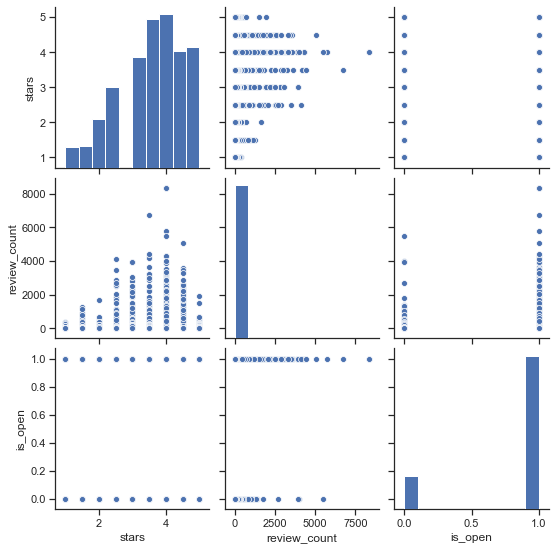

In [6]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(business[['stars', 'review_count', 'is_open']])

**Observations:**
* The star rating distribution is left-skewed, with most ratings concentrate around 3 and 4.5
* Review count is highly right-skewed. Most businesses receive a small number of reviews, while a small number of businesses receive a lot of reviews.
* Most businesses are open, for obvious reasons. It worth notice that open businesses receive more reviews on average.


Let's explore our data a bit more with interesting questions.

**Which states have the most bussineses that appear on Yelp?**

Text(0.5, 1.0, 'Yelp Businesses by States')

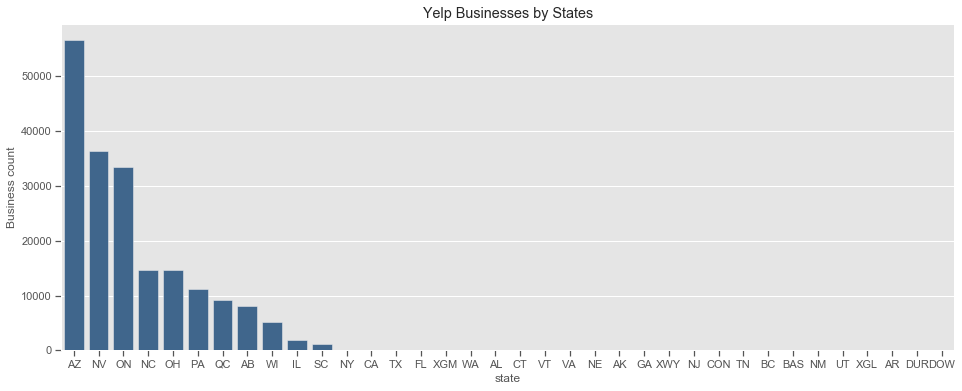

In [7]:
plt.figure(figsize=(16, 6))
plt.style.use('ggplot')
ax =sns.countplot(x= business['state'], order = business['state'].value_counts().index, color=(0.2, 0.4, 0.6, 0.6))
ax.set_ylabel('Business count')
ax.set_title('Yelp Businesses by States')

It looks like Yelp is very popular in Arizona. Let's see compare the number of Yelp Businesses between different US states.

In [8]:
import plotly.graph_objects as go

# Load data frame and tidy it.

state_counts = pd.DataFrame(business['state'].value_counts()).reset_index()
state_counts.columns = ['state', 'business_count']

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['state'], # Spatial coordinates
    z = state_counts['business_count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of Businesses with Yelp",
))

fig.update_layout(
    title_text = 'Yelp Businesses by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

**Interpretation**: In this dataset, Yelp Businesses are concentrated mostly on the East and West coast. 

**Which business categories are the most popular?**

To answer this question, we must process our categories columns in our dataset. I think the easiest way is to concatenate all observations, then counting the frequency that each category occurs: 

In [9]:
business['categories'] = business['categories'].astype(str)
business_cats=''.join(business['categories']).split(',')

In [10]:
# generate initial key-value pairs for frequency table
frequency = dict.fromkeys(business_cats, 0)

# count the categories
for i in business_cats:
    frequency[i] += 1
    
# convert dict into dataframe    
frequency_df = pd.DataFrame({'count':frequency})
frequency_df.reset_index(level=0, inplace=True)

# get the top 20 categories
top20 = frequency_df.sort_values(by = 'count',ascending =False).iloc[:20]

Let's take a look at frequency plot for business categories:

Text(0.5, 1.0, 'Most Popular Yelp Categories')

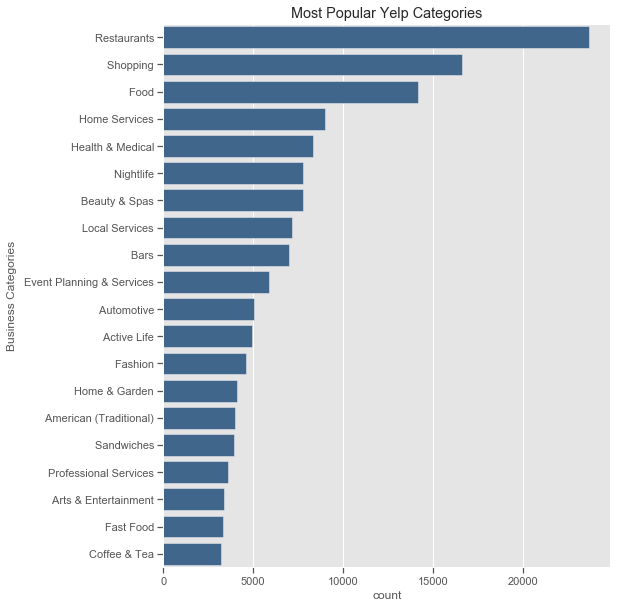

In [11]:
plt.figure(figsize=(8, 10))
ax = sns.barplot(y = 'index', x = 'count', data = top20, color=(0.2, 0.4, 0.6, 0.6))
ax.set_ylabel("Business Categories")
ax.set_title('Most Popular Yelp Categories')

**Observation**: Unsurprisingly Restaurants and Shopping are the two most popular categories. However, I noticed that some categories overlap one another such as Fast Food and Food. This is because of the tag system that allows multiple identifications of a business.

## User Table

Let's move on and explore the user table:

In [12]:
user = pd.read_csv("user.csv", dtype={'elite': object})
user.head()

user_id    name  review_count        yelping_since  useful  \
0  l6BmjZMeQD3rDxWUbiAiow  Rashmi            95  2013-10-08 23:11:33      84   
1  4XChL029mKr5hydo79Ljxg   Jenna            33  2013-02-21 22:29:06      48   
2  bc8C_eETBWL0olvFSJJd0w   David            16  2013-10-04 00:16:10      28   
3  dD0gZpBctWGdWo9WlGuhlA  Angela            17  2014-05-22 15:57:30      30   
4  MM4RJAeH6yuaN8oZDSt0RA   Nancy           361  2013-10-23 07:02:50    1114   

   funny  cool                elite  \
0     17    25       2015,2016,2017   
1     22    16                  NaN   
2      8    10                  NaN   
3      4    14                  NaN   
4    279   665  2015,2016,2017,2018   

                                             friends  fans  ...  \
0  c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...     5  ...   
1  kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...     4  ...   
2  4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...     0  ...   
3  RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...     5  ...   
4  mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...    39  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0                0                   0                0                0   
1                0                   0                0                0   
2                0                   0                0                0   
3                0                   0                0                0   
4                1                   0                0                1   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0                1                 1                1                 1   
1                0                 0                1                 1   
2                1                 0                0                 0   
3                0                 2                0                 0   
4               16                57               80                80   

   compliment_writer  compliment_photos  
0                  2                  0  
1                  0                  0  
2                  0                  0  
3                  1                  0  
4                 25                  5  

[5 rows x 22 columns]

Take a look at the data structure:

In [13]:
user.isna().sum()

user_id                     0
name                        3
review_count                0
yelping_since               0
useful                      0
funny                       0
cool                        0
elite                 1565761
friends                     0
fans                        0
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
compliment_writer           0
compliment_photos           0
dtype: int64

**Observation:** A large number of missing values were identified in variable "elite". A quick search revealed that the "elite" status is a way for Yelp to recognize active and valuable reviewers. Therefore, NaNs do not represent missing data, but the absence of "elite" status. We can generate another variable to represent this "elite" status in a binary conditional array:

In [14]:
user['elite_status'] = ['non-elite' if pd.isna(x) else 'elite' for x in user['elite']]
user[['elite','elite_status']]

elite elite_status
0             2015,2016,2017        elite
1                        NaN    non-elite
2                        NaN    non-elite
3                        NaN    non-elite
4        2015,2016,2017,2018        elite
...                      ...          ...
1637133                  NaN    non-elite
1637134                  NaN    non-elite
1637135                  NaN    non-elite
1637136                  NaN    non-elite
1637137                  NaN    non-elite

[1637138 rows x 2 columns]

Let's count the number of reviewers with elite status:

In [15]:
user['elite_status'].value_counts()

non-elite    1565761
elite          71377
Name: elite_status, dtype: int64

**Observation**: Elite users only make up 4% of all Yelp users.

Let's compare the review counts between elite and non-elite group.

Text(0.5, 1.0, 'Review Count Comparison Between Elite and Non-elite Group')

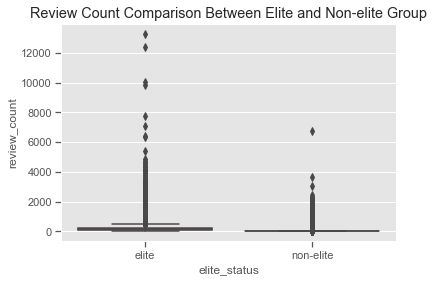

In [16]:
p = sns.boxplot(x = 'elite_status', y = 'review_count', data = user)
p.set_title("Review Count Comparison Between Elite and Non-elite Group")

**Interpretation**: High review count does not necessarily mean elite status. However, at the higher end of the distribution, the outliers are more likely to be an elite. Let's perform a cut-off to make IQRs easier to compare:

Text(0.5, 1.0, 'Review Count Comparison Between Elite and Non-elite Group')

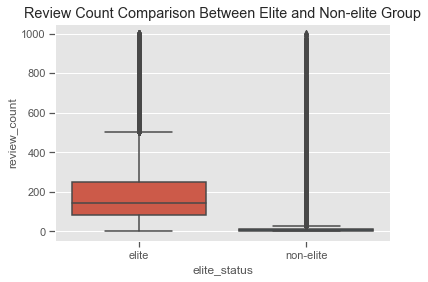

In [17]:
p = sns.boxplot(x = 'elite_status', y = 'review_count', data = user[user['review_count'] < 1000])
p.set_title("Review Count Comparison Between Elite and Non-elite Group")

**Observation**: On average (median), the elite group contribute more reviews on Yelp.

In addition, we can count the number of friends that each user has and compare between these two groups:

In [18]:
# count the friends
user['friend_count'] = [len(x) for x in user['friends'].str.split(',')]

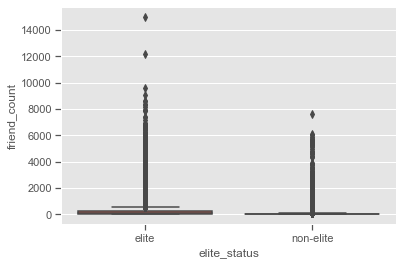

In [19]:
plt.style.use('ggplot')
sns.boxplot(x = user['elite_status'], y = user['friend_count'])

Text(0.5, 1.0, 'Friend Count Comparison Between Elite and Non-elite Group')

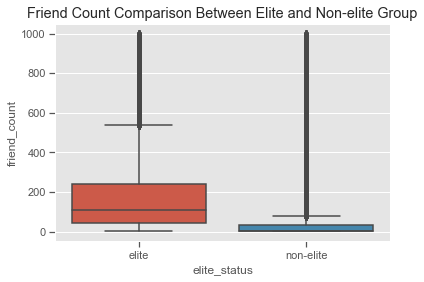

In [20]:
plt.style.use('ggplot')
p = sns.boxplot(x = 'elite_status', y = 'friend_count', data = user[user['friend_count'] < 1000])
p.set_title("Friend Count Comparison Between Elite and Non-elite Group")

**Observation:** We can see the similarity with the previous plot. On average (median), the elite group also tend to have more friends on Yelp.

## Checkin Table - Working with Datetime

In [21]:
checkin = pd.read_csv("checkin.csv")
checkin.head()

business_id                                               date
0  --1UhMGODdWsrMastO9DZw  2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...
1  --6MefnULPED_I942VcFNA  2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...
2  --7zmmkVg-IMGaXbuVd0SQ  2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...
3  --8LPVSo5i0Oo61X01sV9A                                2016-07-08 16:43:30
4  --9QQLMTbFzLJ_oT-ON3Xw  2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010...

In [22]:
checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161950 entries, 0 to 161949
Data columns (total 2 columns):
business_id    161950 non-null object
date           161950 non-null object
dtypes: object(2)
memory usage: 2.5+ MB


The checkin table contains business_id and the datetime of all Yelp checkin. 

**What is the frequency of checkins throughout the day? Does it change through out different days in the week?**

Let's visualize the distribution of checkins with respect to day and time of the week.

In [23]:
# concatenate all datetimes
checkin_dates_cat=','.join(checkin['date']).split(',')

# Store this array into a dataframe
datetime_freq = pd.DataFrame(data = checkin_dates_cat, columns = ['datetime'])
datetime_freq.head()

datetime
0   2016-04-26 19:49:16
1   2016-08-30 18:36:57
2   2016-10-15 02:45:18
3   2016-11-18 01:54:50
4   2017-04-20 18:39:06

Perfect, now we need to generate two additional columns that represent time of the day and day of the week from the given datatimes. We will need to convert to python's datetime format:

In [24]:
datetime_freq['datetime'] = pd.to_datetime(datetime_freq['datetime'])
datetime_freq['datetime']

0          2016-04-26 19:49:16
1          2016-08-30 18:36:57
2          2016-10-15 02:45:18
3          2016-11-18 01:54:50
4          2017-04-20 18:39:06
                   ...        
19089143   2014-07-04 21:28:29
19089144   2014-07-14 01:02:55
19089145   2014-07-14 21:26:59
19089146   2014-07-17 01:06:02
19089147   2014-07-17 19:20:28
Name: datetime, Length: 19089148, dtype: datetime64[ns]

Extract hour and day of the week from datetime:

In [25]:
datetime_freq['hour'] = datetime_freq['datetime'].dt.hour
datetime_freq['day_of_week'] = datetime_freq['datetime'].dt.weekday_name

datetime_freq.head()

datetime  hour day_of_week
0 2016-04-26 19:49:16    19     Tuesday
1 2016-08-30 18:36:57    18     Tuesday
2 2016-10-15 02:45:18     2    Saturday
3 2016-11-18 01:54:50     1      Friday
4 2017-04-20 18:39:06    18    Thursday

Since this dataset is a little bit too large for visualization, it would be a good idea to sample the observations to reduce the computation load:

In [26]:
datetime_freq_sample = datetime_freq.sample(frac=0.1)

Text(0.5, 1.0, 'Distribution of Checkin Hours')

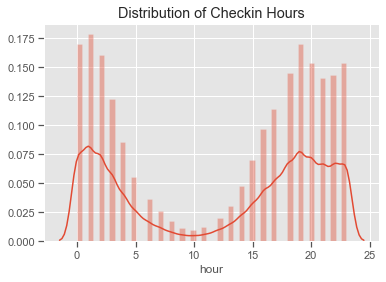

In [27]:
plt.style.use('ggplot')
p = sns.distplot(datetime_freq_sample['hour'])
p.set_title('Distribution of Checkin Hours')

The bimodal distribution suggests that people often check in around evening and after midnight. However, the check-in after midnight is quite strange, given that most businesses Yelp are restaurants, shopping malls, etc., which are closed way before midnight.

Now we can visualize this distribution with a special plot called "joyplot" to discover if there are any changes in Yelp user's checkin frequency throughout the week:

<Figure size 720x504 with 0 Axes>

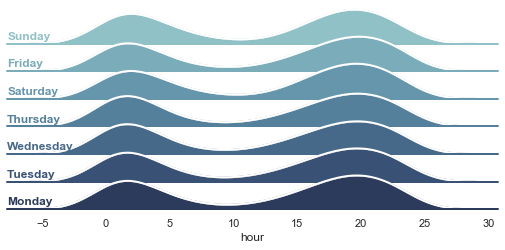

In [28]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
plt.figure(figsize=(10, 7))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
g = sns.FacetGrid(datetime_freq_sample, row="day_of_week", hue="day_of_week", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "hour", clip_on=False, shade=True, alpha=1, lw=1.5, bw=2)
g.map(sns.kdeplot, "hour", clip_on=False, color="w", lw=2, bw=2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "hour")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

**Interpretation**: The "joy plot", also known as "ridge plot", is an advance visualization that allows us to compare the distribution of multiple groups on the same scale. While the tails of the distribution on the weekends are fatter, there are no visible differences between the check-in frequency at any given day.

**Does the number of check-ins changes over time?**

To answer this question, we will need to aggregate our data to a certain time interval such as monthly:

In [29]:
datetime_freq.index = datetime_freq['datetime']
datetime_freq['checkin_count'] = 1
monthly_aggregate = datetime_freq[['checkin_count']].groupby(pd.Grouper(freq='M')).sum()
monthly_aggregate.head()

checkin_count
datetime                 
2010-01-31           2806
2010-02-28           5730
2010-03-31           9419
2010-04-30          10341
2010-05-31          11149

Text(0.5, 1.0, 'Checkin Count Monthly Trendline')

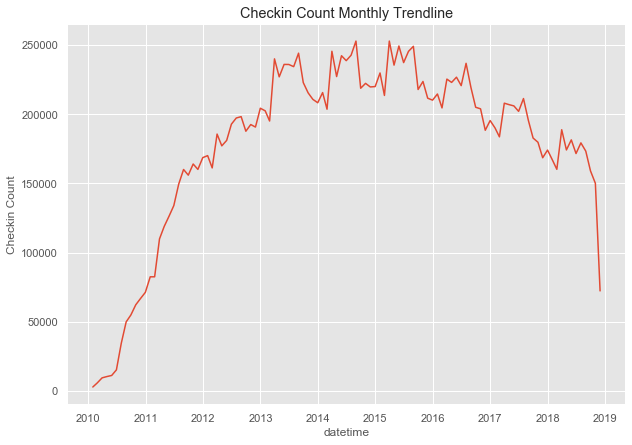

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
p = sns.lineplot(x = monthly_aggregate.index, y = monthly_aggregate['checkin_count'])
p.set_ylabel('Checkin Count')
p.set_title('Checkin Count Monthly Trendline')

**Observation**: It looks like Yelp check-in culture phenomena peaked around 2014 and 2015 and has been declined ever since. Also, the trendline seems to have seasonality, most notably from 2013 to 2019. Let's create a visualization to confirm this effect:

Text(0.5, 1.0, 'Checkin Count Monthly Trendline')

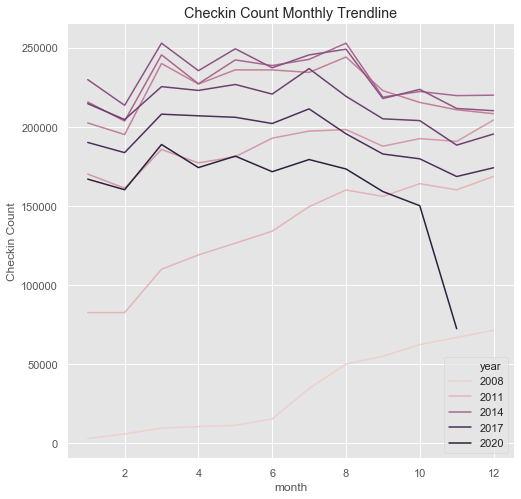

In [31]:
monthly_aggregate['year'] = monthly_aggregate.index.year
monthly_aggregate['month'] = monthly_aggregate.index.month

plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
p = sns.lineplot(x = monthly_aggregate.month, y = monthly_aggregate['checkin_count'], hue = monthly_aggregate['year'])
p.set_ylabel('Checkin Count')
p.set_title('Checkin Count Monthly Trendline')

**Observation**: By comparing the count from year to year, we can see the number of check-ins tend to be lower during the months of winter (Oct, Nov, Dec, Jan, Feb) and higher during the summer months.

## Tip table

Tips are shorter than reviews and tend to convey quick suggestions.

In [32]:
tip = pd.read_csv('tip.csv')
tip.head()

user_id             business_id  \
0  UPw5DWs_b-e2JRBS-t37Ag  VaKXUpmWTTWDKbpJ3aQdMw   
1  Ocha4kZBHb4JK0lOWvE0sg  OPiPeoJiv92rENwbq76orA   
2  jRyO2V1pA4CdVVqCIOPc1Q  5KheTjYPu1HcQzQFtm4_vw   
3  FuTJWFYm4UKqewaosss1KA  TkoyGi8J7YFjA6SbaRzrxg   
4  LUlKtaM3nXd-E4N4uOk_fQ  AkL6Ous6A1atZejfZXn1Bg   

                                                text                 date  \
0  Great for watching games, ufc, and whatever el...  2014-03-27 03:51:24   
1  Happy Hour 2-4 daily with 1/2 price drinks and...  2013-05-25 06:00:56   
2  Good chips and salsa. Loud at times. Good serv...  2011-12-26 01:46:17   
3  The setting and decoration here is amazing. Co...  2014-03-23 21:32:49   
4  Molly is definately taking a picture with Sant...  2012-10-06 00:19:27   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [33]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223094 entries, 0 to 1223093
Data columns (total 5 columns):
user_id             1223094 non-null object
business_id         1223094 non-null object
text                1223090 non-null object
date                1223094 non-null object
compliment_count    1223094 non-null int64
dtypes: int64(1), object(4)
memory usage: 46.7+ MB


Ahh, the sweet smell of a clean and complete dataset.

This table contains text data which I find very interesting. Let's examine the general feedback from the customer using word cloud, a technique to show the most frequent words in a document. First, we need to concatenate all customer tips together into a single string object:

In [34]:
text = ''.join(tip['text'].astype(str))

In [35]:
# generate word cloud using wordcloud library
from wordcloud import WordCloud 
wordcloud = WordCloud(max_words=100, background_color="white",width=800,height = 400).generate(text)

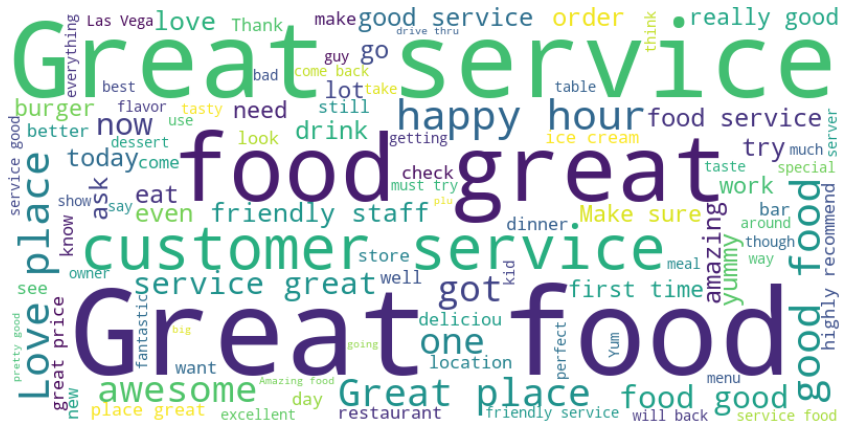

In [36]:
# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation**: Looking at the most popular words, I have changed my prior belief that tips would contain opinionated suggestions, which would be more critical in voice and tone. It seems like most tips contain complements to the businesses.

## Section Conclusion

You made it through the EDA section! Thank you for sticking out, I appreciate your interest in reading my creative processes. Even though I have barely scratched the surface of this dataset, I have learned a tremendous amount by experimenting with different data wrangling and visualization methods. This EDA will serve as a useful introduction before conducting more extensive analysis in the later stages of this project.